<a href="https://colab.research.google.com/github/zhong338/MFM-FM5222/blob/main/Week5_LectureSlide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FM 5222
# Week 5



## Mutivariate Distributions

Up until now, we have focused on fitting data to univariate distributions. But often, we are interested in how certain variables move together.  For example, how the random changes in the S&P500 relate to random changes in the Dow Jones Industrial Average.  

This week, we will look at

* Ways to visulalize and explore multivariate data
* The multivariate normal distribution
* The multivariate student t distribution
* Skew extensions of the previous.

In general, multivariate distributions are more difficult to deal with. One of the more popular approaches (beyond the above) is to use copulas.  Unfortunatly, We are not going to cover that topic due to time.



## Exploring Data
 
#### Example 
Gather log-return info on the S&P500, DJIA, Rusell2000, and S&P400 (midcaps).  Explore them as a multivariate data set.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd

In [ ]:
!pip install yfinance 

!pip install scipy==1.7.1

     |████████████████████████████████| 6.4 MB 4.5 MB/s 
     |████████████████████████████████| 63 kB 871 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 28.5 MB 1.5 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pi

In [ ]:
import yfinance as yf

In [ ]:
tickers = ["^GSPC", "^DJI", "^RUT", "^MID"]

data = yf.download(tickers, start = "2012-01-01", end = "2022-01-01")

[*********************100%***********************]  4 of 4 completed


In [ ]:
data

Adj Close                            ...      Volume                 
                    ^DJI        ^GSPC         ^MID  ...       ^GSPC ^MID        ^RUT
Date                                                ...                             
2012-01-03  12397.379883  1277.060059   887.909973  ...  3943710000    0  3943710000
2012-01-04  12418.419922  1277.300049   885.520020  ...  3592580000    0  3592580000
2012-01-05  12415.700195  1281.060059   891.659973  ...  4315950000    0  4315950000
2012-01-06  12359.919922  1277.810059   891.489990  ...  3656830000    0  3656830000
2012-01-09  12392.690430  1280.699951   896.409973  ...  3371600000    0  3371600000
...                  ...          ...          ...  ...         ...  ...         ...
2021-12-27  36302.378906  4791.189941  2833.179932  ...  2264120000    0  2264120000
2021-12-28  36398.210938  4786.350098  2832.239990  ...  2217050000    0  2217050000
2021-12-29  36488.628906  4793.060059  2847.830078  ...  2369370000    0  2369370000
2021-12-30  36398.078125  4778.729980  2839.330078  ...  2390990000    0  2390990000
2021-12-31  36338.300781  4766.180176  2842.000000  ...  2446190000    0  2446190000

[2517 rows x 24 columns]

This in example aa data frame with multilevel indexing of the columnms.

In [ ]:
data.columns

MultiIndex([('Adj Close',  '^DJI'),
            ('Adj Close', '^GSPC'),
            ('Adj Close',  '^MID'),
            ('Adj Close',  '^RUT'),
            (    'Close',  '^DJI'),
            (    'Close', '^GSPC'),
            (    'Close',  '^MID'),
            (    'Close',  '^RUT'),
            (     'High',  '^DJI'),
            (     'High', '^GSPC'),
            (     'High',  '^MID'),
            (     'High',  '^RUT'),
            (      'Low',  '^DJI'),
            (      'Low', '^GSPC'),
            (      'Low',  '^MID'),
            (      'Low',  '^RUT'),
            (     'Open',  '^DJI'),
            (     'Open', '^GSPC'),
            (     'Open',  '^MID'),
            (     'Open',  '^RUT'),
            (   'Volume',  '^DJI'),
            (   'Volume', '^GSPC'),
            (   'Volume',  '^MID'),
            (   'Volume',  '^RUT')],
           )

In [ ]:
Lrets =       np.log(data["Close"]).diff()

In [ ]:
Lrets = Lrets.dropna()

In [ ]:
Lrets

,^DJI,^GSPC,^MID,^RUT
Date,,,,
2012-01-04,0.001696,0.000188,-0.002695,-0.006669
2012-01-05,-0.000219,0.002939,0.006910,0.006682
2012-01-06,-0.004503,-0.002540,-0.000191,-0.003435
2012-01-09,0.002648,0.002259,0.005504,0.005056
2012-01-10,0.005615,0.008847,0.012747,0.014807
...,...,...,...,...
2021-12-27,0.009739,0.013744,0.013274,0.008830
2021-12-28,0.002636,-0.001011,-0.000332,-0.006633
2021-12-29,0.002481,0.001401,0.005489,0.001214


In R, there is neat command call "pairs".  In pandas, we have scatter_matrix


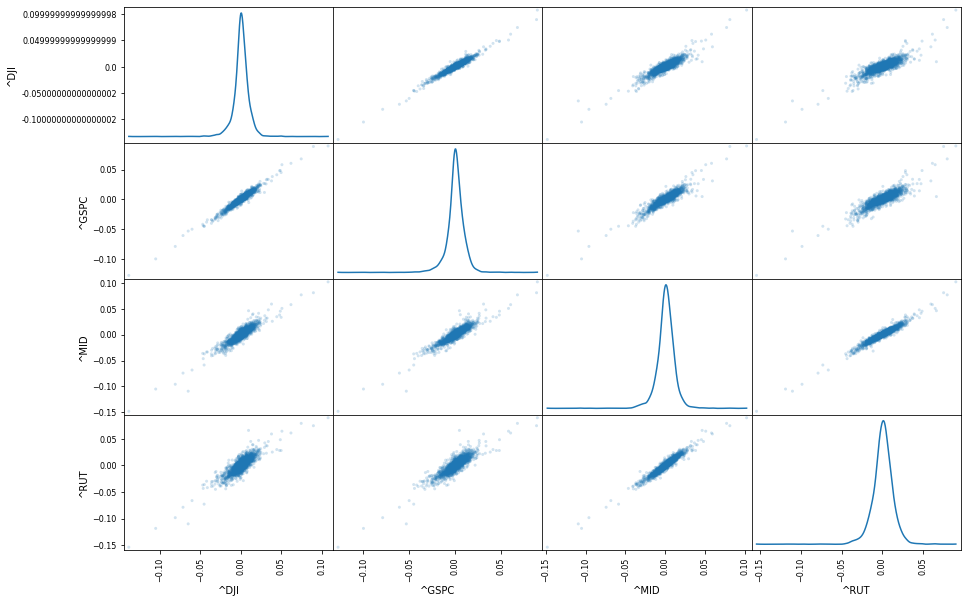

In [ ]:

pd.plotting.scatter_matrix(Lrets, figsize = (15,10),diagonal='kde' ,alpha=0.2)

plt.show()

We visually see that all 4 indices move with each other.  But the S&P500 moves most tightly with Dow Jones. And also that mid caps move with small caps.  

Let'ss calculate the correlations.

In [ ]:
Lrets.corr()

,^DJI,^GSPC,^MID,^RUT
^DJI,1.000000,0.968595,0.906030,0.852442
^GSPC,0.968595,1.000000,0.919372,0.877452
^MID,0.906030,0.919372,1.000000,0.965654
^RUT,0.852442,0.877452,0.965654,1.000000


A nice way to visualize this is using the seaborn package (which does a lot of nice things we just haven't used since we mostly could to them with matplotlib.pyplot).

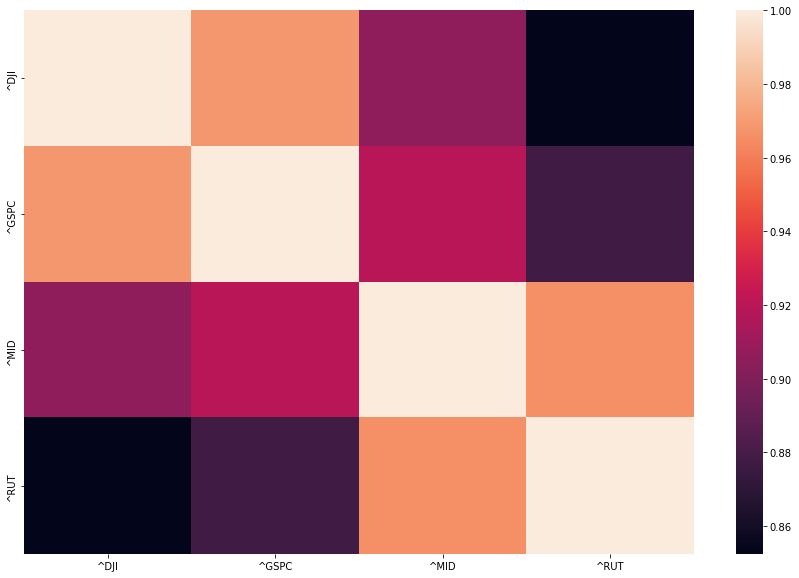

In [ ]:
import seaborn as sb

plt.figure(figsize = (15,10))
sb.heatmap(Lrets.corr())

plt.show()

Now let's do another example. We compare Gold, Oil, USD/CD, and Coffee. Here will just look at their changes, not their relative changes.

In [ ]:
ctickers = ["GC=F", "CL=F", "CAD=X", "KC=F"]

cdata = yf.download(ctickers, start = "2012-01-01", end = "2022-01-01")



[*********************100%***********************]  4 of 4 completed


In [ ]:
c_changes = cdata.Close.diff()
c_changes = c_changes.dropna()

c_changes

,CAD=X,CL=F,GC=F,KC=F
Date,,,,
2012-01-04,-0.00630,0.260002,12.200073,-0.500000
2012-01-05,0.00230,-1.410004,7.500000,-7.149994
2012-01-06,0.00620,-0.250000,-3.300049,2.199997
2012-01-09,0.00950,-0.250000,-8.599976,0.100006
2012-01-10,-0.00670,0.930000,23.500000,4.099991
...,...,...,...,...
2021-12-23,-0.00718,1.029999,9.599976,-2.350006
2021-12-28,-0.00270,0.410004,2.099976,-1.449997
2021-12-29,0.00260,0.579994,-5.099976,3.299988


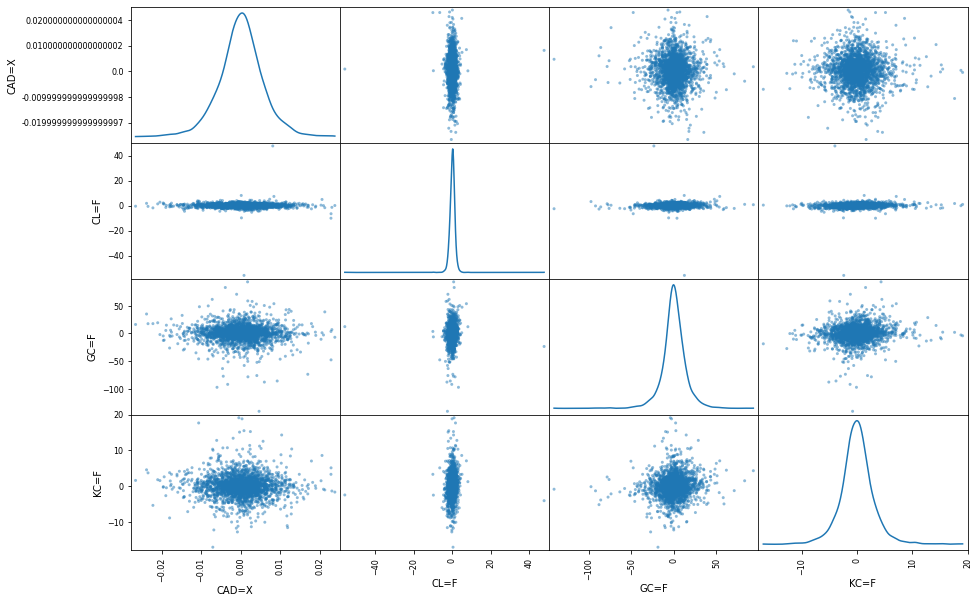

In [ ]:
pd.plotting.scatter_matrix(c_changes, figsize = (15,10),diagonal='kde' )

plt.show()

These appear to show not much relationship

In [ ]:
c_changes.corr()

,CAD=X,CL=F,GC=F,KC=F
CAD=X,1.000000,-0.008080,-0.031042,-0.018951
CL=F,-0.008080,1.000000,0.055472,0.075829
GC=F,-0.031042,0.055472,1.000000,0.107266
KC=F,-0.018951,0.075829,0.107266,1.000000


## Mutivariate Normal

In the recent videos, we dicussedd the Bi-variate normal distribution. But we pointed out at the end that we are not limited to 2 randome variables, we could have several.  

The multivariate normaal distribution is specified by it's covariance matrix $\Sigma$ and it's mean vector $\mathbf{\mu}$


If $\mathbf{X} = (X_1, X_2,...,X_n)^T$ is our vector values random variable, the MV normal PDF is

$$F_{\mathbf{X}}(\mathbf{x}) = \frac{1}{(2\pi)^{\frac{n}{2}} \sqrt{\det(\Sigma)}}e^{-\frac{1}{2}(\mathbf{x-\mu})^T\Sigma^{-1}(\mathbf{x-\mu})}$$


Not that if we define the volatitlity vector 

$\mathbf{v} = [\sigma_{X_1},\sigma_{X_2}, ...,\sigma_{X_n}]^T$ 

and the correlation matrix 

$C_{i,j} = \frac{\Sigma_{i,j}}{\sigma_{X_i} \sigma_{X_j}}$ 

then we can rewrite $\Sigma$ as

$\Sigma = \mathrm{diag}(\mathbf{v}) C \mathrm{diag}(\mathbf{v})$


This in turn means that if we set $Y_k = \frac{X_k- \mu_k}{\sigma_{X_k}}$, the PDF is

$$f_{\mathbf{X}}(x) = \frac{1}{(2\pi)^{\frac{n}{2}} \sqrt{\det(\Sigma)}}e^{-\frac{1}{2}\mathbf{y}^TC^{-1}\mathbf{y}}$$


We see that shifting and scaling the components of $\mathbf{X}$ impacts location and variance, but not correlation.





### Fitting the Multivariate Normal

One nice thing about the multvariate normal is that the MM and MLE approaches will lead to the same result.  That is, if you maximize the log-liklhood, the parameters will turn out to be 

1. The sample mean (vector)
2. The covariance of the sample.

It's worth noting that while the covariance matrix is $n \times n$, it is symmetric.  So the number of parameters is $n + \frac{n(n+1)}{2}$  


Alternatively one could find the mean ($n$ parameters), the standard deviations ($n$ paramaters) and the correlation matrix ($\frac{n(n -1)}{2}$ parameters).

This is the same number of parameters since

$$n + \frac{n(n+1)}{2} = n + \frac{n^2 + n}{2} = n + n + \frac{n^2 - n}{2}$$



Let's take our commondity changes data and fit them to a multivariate normal. 




In [ ]:
mean_vector = c_changes.mean()
Sig_est = c_changes.cov()

In [ ]:
Sig_est

,CAD=X,CL=F,GC=F,KC=F
CAD=X,0.000032,-0.000090,-0.002583,-0.000328
CL=F,-0.000090,3.845369,1.591412,0.453250
GC=F,-0.002583,1.591412,214.034396,4.783421
KC=F,-0.000328,0.453250,4.783421,9.291194


Note however that this matrix has large and small numbers along the diagonal. This makes it likely ill-conditioned.  Let's check.  Recall that if we take the base ten log of this, it's roughly how many decimal point of accuracy we lose when numerically computing with it.

In [ ]:
np.linalg.cond(Sig_est), np.log10(np.linalg.cond(Sig_est))

(6630885.648126278, 6.8215715384208355)

What can we do different?  One approach would be to standardize the variables first, and then calculate the correlation matrix.   Let's try that.

In [ ]:
sigs = c_changes.std()

c_changes_stand = (c_changes - mean_vector)/sigs

The covariance of this matrix and it's correlation matrix will be the same

In [ ]:
corr_est = c_changes_stand.corr()

c_changes_stand.cov() , corr_est

(          CAD=X      CL=F      GC=F      KC=F
 CAD=X  1.000000 -0.008080 -0.031042 -0.018951
 CL=F  -0.008080  1.000000  0.055472  0.075829
 GC=F  -0.031042  0.055472  1.000000  0.107266
 KC=F  -0.018951  0.075829  0.107266  1.000000,
           CAD=X      CL=F      GC=F      KC=F
 CAD=X  1.000000 -0.008080 -0.031042 -0.018951
 CL=F  -0.008080  1.000000  0.055472  0.075829
 GC=F  -0.031042  0.055472  1.000000  0.107266
 KC=F  -0.018951  0.075829  0.107266  1.000000)

Did we improve the condition number?


In [ ]:
np.linalg.cond(corr_est), np.log10(np.linalg.cond(corr_est))

(1.313482706804488, 0.11842435927753234)

For this reason, it is sometimes preferable to standardize before estimating the correlation matrix.  Though, in theory, the result should be the same.

#### Example

Let's simplify and just estimate the joint distribution of Gold and Coffee as a bivariate normal.

In [ ]:
GCdata = c_changes.iloc[:,2:4]
GCdata

,GC=F,KC=F
Date,,
2012-01-04,12.200073,-0.500000
2012-01-05,7.500000,-7.149994
2012-01-06,-3.300049,2.199997
2012-01-09,-8.599976,0.100006
2012-01-10,23.500000,4.099991
...,...,...
2021-12-23,9.599976,-2.350006
2021-12-28,2.099976,-1.449997
2021-12-29,-5.099976,3.299988


For our parameters estimates, we will want to find

1. The sample means
2. The standard deviations
3. The correlations.



In [ ]:
means = GCdata.mean()
stds = GCdata.std()
corr = GCdata.corr()

print("Estimated means are ", means )
print("Estimated sigmas are ", stds)
print("Estimtated correlation is ", corr)

Estimated means are  GC=F    0.067497
KC=F    0.019323
dtype: float64
Estimated sigmas are  GC=F    14.629914
KC=F     3.048146
dtype: float64
Estimtated correlation is            GC=F      KC=F
GC=F  1.000000  0.107266
KC=F  0.107266  1.000000


Now, let's bootstrap to understand the uncertianty around our estimates.   We can't use np.random.choice because that is for one-dimensional arrays. However, pandas has a sample method that will suit us just fine.

In [ ]:
M = 1000

bs_means = np.zeros([M,2])

bs_stds = np.zeros([M,2])

bs_corrs = np.zeros(M)  # since there is only one correlation here

for k in range(M):
    
    bsdata = GCdata.sample(n = len(GCdata),  replace = True)
                           
    bs_means[k,:] = bsdata.mean()
    bs_stds[k,:]= bsdata.std()
    bs_corrs[k] = bsdata.corr().iloc[1,0]                       
                           





Now let's take a look.  First at our mean estimates.

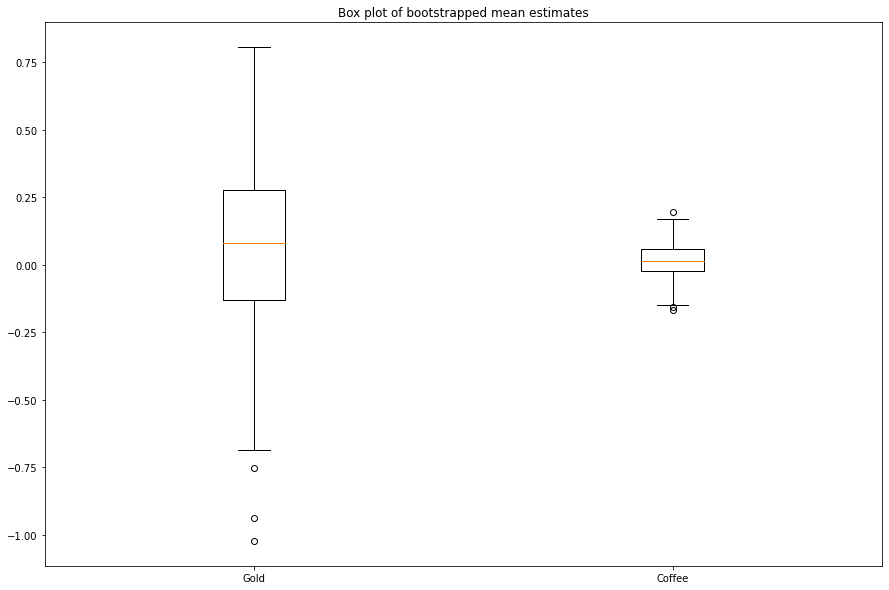

In [ ]:
plt.figure(figsize = (15,10))

plt.boxplot(bs_means, labels = ["Gold", "Coffee"])


plt.title("Box plot of bootstrapped mean estimates")

plt.show()

And for our standard Deviations

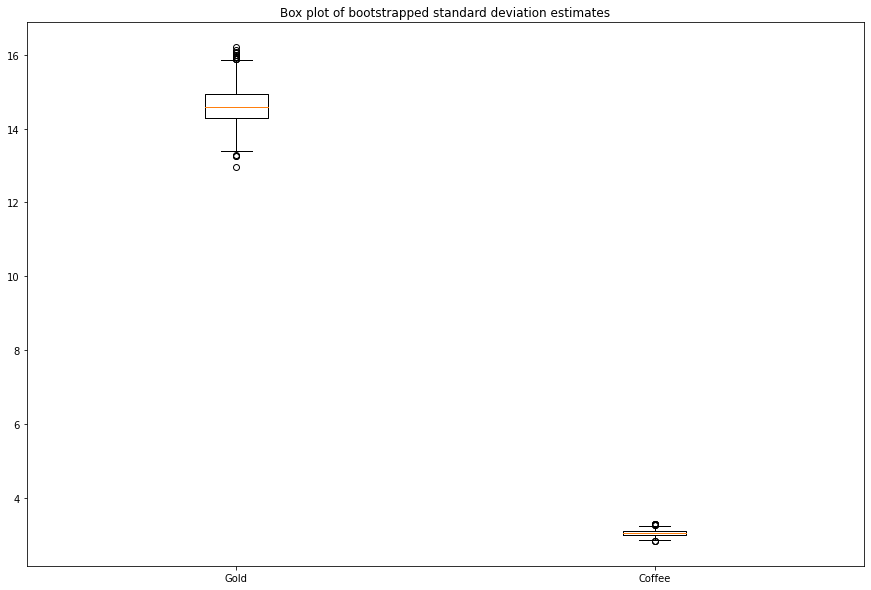

In [ ]:
plt.figure(figsize = (15,10))

plt.boxplot(bs_stds, labels = ["Gold", "Coffee"])


plt.title("Box plot of bootstrapped standard deviation estimates")

plt.show()

And now the correlations.

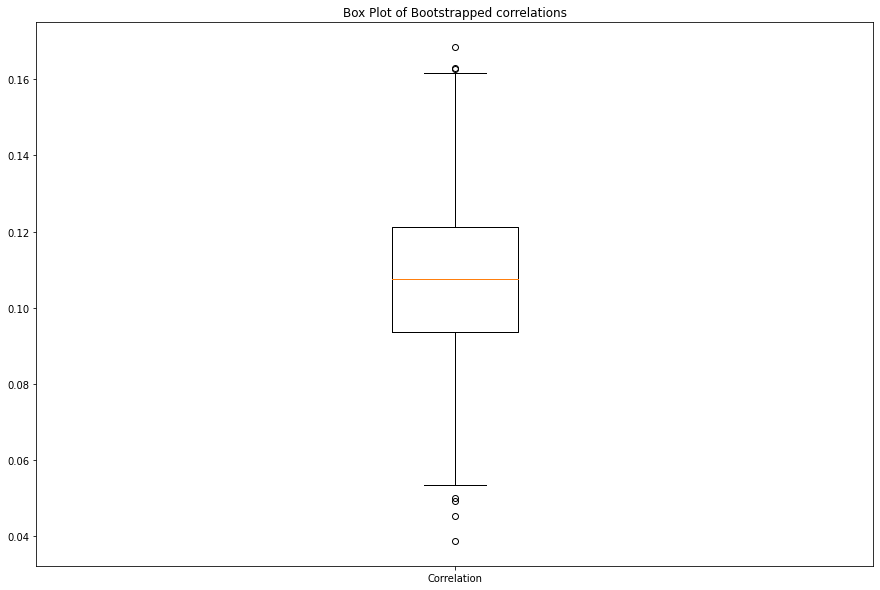

In [ ]:
plt.figure(figsize = (15,10))

plt.boxplot(bs_corrs, labels = ["Correlation"] )


plt.title("Box Plot of Bootstrapped correlations")

plt.show()

Note that the ranges indicatedd in the box-plots are not confidence intervals. Instead, we would use the basic bootrap confidence interval.  However, the length of the intervals would be the same.

## Multivariate Student T

The normal disribution is tractable, but suffers (as we have seen) from having tails that are generally much "thinner" than commonly seen in financial data.  Just like with univariate distributions, the student T provides us with a nice generalization of the multivariate normal.  

Recall that the univariate student T is obtained as a continous mixture distribution of normal random variables. In the base case, if we have $\nu$ degrees freedom, the standard T random variable is 

$$X = \sqrt{\frac{\nu}{W_{\nu}}}Z$$

where $ Z \sim \mathcal{N}(0,1)$ and $W_{\nu} \sim \chi^2_{\nu}$ ($W_{\nu}$ and $Z$ are indepdenant).

By shifting and scaling $Z$, we obtain the 3 parameter family of univariate student t distributions.

Recall the PDF for the standard case is

$$f_X(x) = \frac{\Gamma\left(\frac{\nu +1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right)}\left(   1+ \frac{x^2}{\nu}\right)^{-\frac{\nu +1}{2}}$$

If we shift and scale, this becomes


$$f_X(x) = \frac{\Gamma\left(\frac{\nu +1}{2}\right)}{\sqrt{\nu \pi} \Gamma\left(\frac{\nu}{2}\right) \sigma}\left(   1+ \frac{y(x)^2}{\nu}\right)^{-\frac{\nu +1}{2}}$$

where

$$y(x) = \frac{x - \mu}{\sigma}$$





#### Multivarariate T distribution, Base case

We define this as vector valued RV as

$$\mathbf{X} = \sqrt{\frac{\nu}{W_{\nu}}}\mathbf{Z}$$

where $Z$ is the n-dimensional standard multivariate normal distribution.

The PDF here relates to the univariate PDF is a simlar manner as the normal does. We replace the $x^2$ with a quadratic form and making appropriate changes to the constant on the outside.    That is,

$$f_{\mathbf{X}}(\mathbf{x}) = \frac{\Gamma\left(\frac{\nu +n}{2}\right)}{(\nu \pi)^{\frac{n}{2}} \Gamma\left(\frac{\nu}{2}\right)}\left(   1+ \frac{\mathbf{x}^T\mathbf{x}}{\nu}\right)^{-\frac{\nu +n}{2}}    $$

Note here that $\mathbf{x}^T\mathbf{x} = \mathbf{x}^TI_n\mathbf{x}$ which makes sense this the covariance matrix for the multivariate standard normal is the idendity matrix.


#### Multivarariate T distribution, General case


So the translation of this if not just a matter if shifting and scaling, because we also need to pick the correlation structure.   We set the "scales" to $\mathbf{v} = (v_1, v_2,...,v_n)^T$, the shifts to be $\mathbf{\mu}$, and the correlation matrix to be $C$.  Then taking $\Sigma = \mathrm{diag}{\mathbf{v} }^TC\mathrm{diag}{\mathbf{v} }$ and PDF is


$$f_{\mathbf{X}}(\mathbf{x}) = \frac{\Gamma\left(\frac{\nu +n}{2}\right)}{(\nu \pi \det(\Sigma))^{\frac{n}{2}} \Gamma\left(\frac{\nu}{2}\right  )}\left(   1+ \frac{(\mathbf{x-\mu})^T\Sigma(\mathbf{x-\mu})}{\nu}\right)^{-\frac{\nu +n}{2}}    $$


Again, fortunately for us, we don't need to code this, since scipy stats as a module multivariate_t.






### Correlation and Tail Dependence

The variance of a univarate T distribution is $\frac{\nu}{\nu-2} s^2$ where $s^2$ is variance of the related normal distribution.

Similarly, the covariance of the multivariate T is given by

$$\mathrm{Cov}(\mathbf{X}) = \frac{\nu}{\nu-2}\Sigma$$

This means in particular that the correlation matrix is the same as the correlation the corresponding normal distribution.  

However, unlike the multivariate normal distribution, this does not mean that the variables are indepdendent.  In general they are not.   In particular, if the draw from the $\chi_{\nu}^2$ distribution is "small", then all of the components of $\mathrm{X}$ will be large even if the corresponding draws from the normal distribution are independent.  In short, large values for $X_k$ tend happen when there are large values of $X_j ( j\neq k)$.

This is called tail dependence.


One implication of this is that the components of a multi-variable T distribution can be uncorrelated, but they are nevertheless **not** independent.

It is worth noting as well that tail-depdendence is commonly seen in financial data, and this gives further support for the suitability of using the multivariate T beyond simply wanting kurtosis in the marginals.

### Parameter Estimation

Ideally, we would do an MLE estimation. But, as it turns out, this is not an immediately easy thing to do.  In the text, this is done in R two ways.

1. The function cov.trob in the MASS package estimates the MLE for the $\Sigma$ and $\mathbf{\mu}$ given a fixed value of $\nu$.   For each value of $\nu$, the log-liklihood can be directly computed. Then $\nu$ is search to maximize this value.

2. When estimating for the skewed t (see next section), the function mst.mple() from the sn package  does the optimization over all the parameters.  


In python, I did not find such a package. Though, I may not have looked hard enough.  However, there are some potential work-arounds:

1. Just us R.  There are many packages that appear to do this. However, the documentation is a bit lacking (IMO).
2. Use scipy.stats.multivariate_t.logpdf to calculate the relvant liklihoods given the paramets, and optimize (this can be tricky, just attempting to use scipy.optimize won't likely work well).
3. Implement the relatively robust EM approach in python (no doubt, someone has already done this).


For now, due to time, I will simply state that an MLE (numerically) is possible, and I will follow up with video on this exact topic.

#### Example

We will fit our previous example using work-around 1.

In [ ]:
import rpy2.rinterface


%load_ext rpy2.ipython

In [ ]:
%%R -i GCdata

library(tidyverse)

summary(GCdata)      
    
    


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



      GC=F                KC=F          
 Min.   :-140.4000   Min.   :-16.95000  
 1st Qu.:  -6.2000   1st Qu.: -1.55000  
 Median :   0.1999   Median :  0.00000  
 Mean   :   0.0675   Mean   :  0.01932  
 3rd Qu.:   7.1000   3rd Qu.:  1.55000  
 Max.   :  93.2000   Max.   : 19.10001  


We will use the package fitHeavyTail

In [ ]:
%%R


install.packages("fitHeavyTail")




In [ ]:
%%R

library(fitHeavyTail)

help(fit_mvt)

File: /tmp/Rtmpfn1sc0/Rtxtb017b8a2c
fit_mvt              package:fitHeavyTail              R Documentation



_E_s_t_i_m_a_t_e _p_a_r_a_m_e_t_e_r_s _o_f _a _m_u_l_t_i_v_a_r_i_a_t_e _S_t_u_d_e_n_t'_s _t _d_i_s_t_r_i_b_u_t_i_o_n _t_o _f_i_t

_d_a_t_a



_D_e_s_c_r_i_p_t_i_o_n:



     Estimate parameters of a multivariate Student's t distribution to

     fit data, namely, the mean vector, the covariance matrix, the

     scatter matrix, and the degrees of freedom. The data can contain

     missing values denoted by NAs. It can also consider a factor model

     structure on the covariance matrix. The estimation is based on the

     maximum likelihood estimation (MLE) and the algorithm is obtained

     from the expectation-maximization (EM) method.



_U_s_a_g_e:



     fit_mvt(

       X,

       na_rm = TRUE,

       nu = c("kurtosis", "MLE-diag", "MLE-diag-resampled", "iterative"),

       nu_iterative_

In [ ]:
%%R

result1 = fit_mvt(GCdata, nu = "kurtosis")  # estimates nu via kurtosis and MLE for the rest.

result1

$mu
      GC=F       KC=F 
 0.2712875 -0.0341173 

$cov
           GC=F     KC=F
GC=F 181.497423 4.116951
KC=F   4.116951 8.872131

$scatter
           GC=F     KC=F
GC=F 107.168896 2.430939
KC=F   2.430939 5.238732

$nu
[1] 4.883654

$converged
[1] TRUE

$num_iterations
[1] 6

$cpu_time
elapsed 
  0.025 



In [ ]:
%%R

result2 = fit_mvt(GCdata, nu = "iterative")  # Uses an iterative approach to esstimate all parameters MLE.

result2

$mu
       GC=F        KC=F 
 0.26326165 -0.03872576 

$cov
           GC=F      KC=F
GC=F 219.294797  4.980262
KC=F   4.980262 10.823124

$scatter
          GC=F     KC=F
GC=F 94.813010 2.153237
KC=F  2.153237 4.679422

$nu
[1] 3.523323

$converged
[1] TRUE

$num_iterations
[1] 8

$cpu_time
elapsed 
  0.028 



Getting the output back into Python in a useful way wasn't simple, but here is one way

In [ ]:
rout = %Rget result2

result = {}

for k, j in enumerate(rout):
    result[rout.names[k]] = np.array(j)


result

{'converged': array([1], dtype=int32),
 'cov': array([[219.29479668,   4.98026209],
        [  4.98026209,  10.8231239 ]]),
 'cpu_time': array([0.028]),
 'mu': array([ 0.26326165, -0.03872576]),
 'nu': array([3.52332341]),
 'num_iterations': array([8], dtype=int32),
 'scatter': array([[94.81301004,  2.15323686],
        [ 2.15323686,  4.67942227]])}

Notice the MLE means are not the same as the straight means.


In [ ]:
GCdata.mean(), result['mu']
   

(GC=F    0.067497
 KC=F    0.019323
 dtype: float64, array([ 0.26326165, -0.03872576]))

What about the correlation?

In [ ]:
GCdata.corr().iloc[0,1]  ,result['scatter'][0,1]/np.sqrt( result['scatter'][0,0]*result['scatter'][1,1]  )

(0.10726573401606324, 0.10222608294706793)

Those are pretty close.

Let's compare the AIC of this fit with the previous multinormal fit.

In [ ]:
p_t = 6
AIC_T  = -2*ss.multivariate_t.logpdf(GCdata, loc = result['mu'],shape = result['scatter'], df =result["nu"]).sum() - 2*p_t
print(AIC_T)



31050.51016694517


In [ ]:
import scipy

scipy.__version__

In [ ]:
p_n = 5

AIC_n = -2*ss.multivariate_normal.logpdf(GCdata, mean = GCdata.mean(),cov = GCdata.cov()).sum() - 2*p_n
print(AIC_n)

31929.85922417644


We see under AIC, the multivariate T is preferred (unsurprisingly).


### Mulivariate Skew  Normal and T

For any of the marginal distributions, neither the multivariable skew nor the multivariabe T will exhibit skew.  One can however create skew in the Azzalini and Capatinaio manner.  But here, instead of a single parameter $a$, we need a vector of values $\mathbf{a} = (a_1,a_2,...a_n)$.  


#### Mulivariate Skew  Normal 

Start with the multivariate standard normal *with correlation* whose PDF is

$$f_\mathbf{X}(\mathbf{x};C) = \frac{1}{(2\pi)^{\frac{n}{2}} \sqrt{\det(C)} }e^{-\frac{1}{2}\mathbf{x}^TC^{-1}\mathbf{x}}$$

where $C$ is the correlation matrix.


We can add skew by defining the PDF

$$g_{\mathbf{X}}(\mathbf{x}; C, \mathbf{a}) =2f_{\mathbf{X}}(\mathbf{x};C)\Phi(\mathbf{a^Tx})$$


We can then select the marginal standard deviation vector $\mathbf{v} = (v_1,v_2, ..., v_n)$ and location vector $\mathbf{\mu} = (\mu_1, \mu_2,..., \mu_n)$ and we now have


$$g_{\mathbf{X}}(\mathbf{x}; C, \mathbf{a}) =2f_{\mathbf{X}}(\mathbf{y};\Sigma)\Phi(\mathbf{a^Ty})$$

where 

$$y_k = \frac{\mathbf{x-\mu_k}}{v_k}$$

and

$$\Sigma = \mathrm{diag}(\mathbf{v}) \Sigma\mathrm{diag}(\mathbf{v})$$


Again, a widely distributed package in Python to handle this is unkown to me.  However, they do exist in R. 


## Exercise in class


Consider the first data set involving stocks.  Fit it to the multivariate normal and (using R) fit it to the multivariate t distribution.  You will have $4$ columns (not $2$).



Homework will be this along with a few exercises which I will publish tomorrow.
